The dataset contains 125 resumes, in the resume_text column. Resumes were queried from Indeed.com with keyword 'data scientist', location 'Vermont'. If a resume is 'not flagged', the applicant can submit a modified resume version at a later date. If it is 'flagged', the applicant is invited to interview.

### Importing Necessary Libraries

In [1]:
!pip install nltk
!pip install gensim
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
import warnings; warnings.filterwarnings("ignore")

### Reading and understanding the data

In [3]:
df = pd.read_csv("Sheet_2.csv", encoding = 'latin-1')
df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [4]:
df = df[["resume_text", "class"]]

In [5]:
df.iloc[[0,-1],:]

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
124,\rResearch and Development Scientist - Burling...,not_flagged


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

resume_text    0
class          0
dtype: int64

In [8]:
df["class"].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [9]:
df["class"] =  df["class"].apply(lambda x:1 if x == 'flagged' else 0)
df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


In [10]:
df["class"].value_counts()

0    92
1    33
Name: class, dtype: int64

### Data Cleaning

In [11]:
df["resume_text"] = df["resume_text"].apply(lambda x: x.replace("\r", ""))
df

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [12]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(['from','subject','reply','use','email','com'])

In [14]:
# removing stopwords and removing words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [15]:
#cleaned text
df["cleaned"] = df["resume_text"].apply(preprocess)

In [16]:
print(df["cleaned"][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

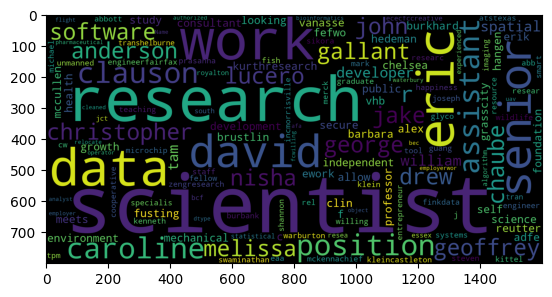

In [17]:
#plotting the word cloud for text that is flagged 
#plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(df[df['class']==1].cleaned))
plt.imshow(wc)

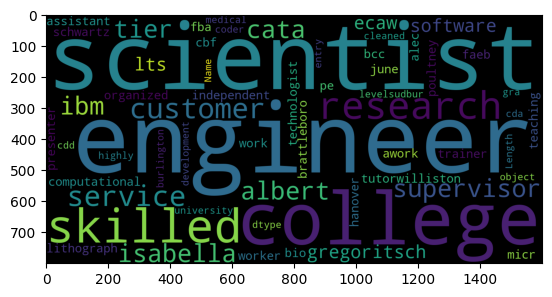

In [18]:
#plotting the word cloud for text that is non flagged 
wc = WordCloud(max_words = 2000, width= 1600, height= 800, stopwords = stop_words).generate(str(df[df['class']==0].cleaned))
plt.imshow(wc)

### Converting to vectors

In [19]:
#applying countvecatorizer to cleaned text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(df["cleaned"])

In [20]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [21]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
X = countvectorizer

In [23]:
y = df["class"]

In [24]:
X.shape

(125, 11315)

In [25]:
y.shape

(125,)

### Model Building

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(x_train, y_train)

MultinomialNB()

### Evaluating the performance

<Axes: >

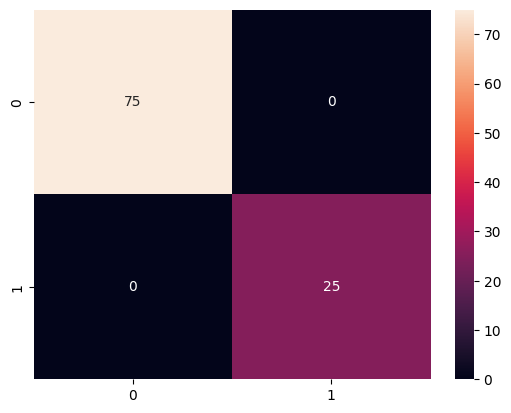

In [28]:
# Predicting the performance on train data
y_predict_train = MNB.predict(x_train)

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

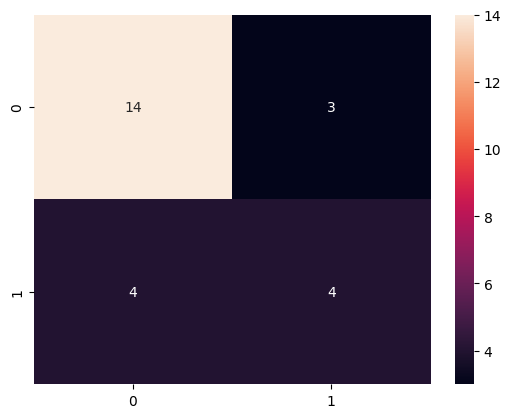

In [29]:
# Predicting the performance on test data
y_predict_test = MNB.predict(x_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [30]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.57      0.50      0.53         8

    accuracy                           0.72        25
   macro avg       0.67      0.66      0.67        25
weighted avg       0.71      0.72      0.71        25

